In [ ]:
# @title Task1: Khai báo các thư viện cần dùng
# task1: Import libraries
# Khai báo thư viện
import pandas as pd # đọc dữ liệu
import numpy as np
import matplotlib.pyplot as plt # vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler # chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint # lưu lại huấn luyện tốt nhất
from tensorflow.keras.models import load_model # tải mô hình
# Các lớp để xây dựng mô hình
from keras.models import Sequential #Đầu vào
from keras.layers import LSTM #Học phụ thuộc
from keras.layers import Dropout # tránh học tủ
from keras.layers import Dense # đầu ra
from keras.layers import Input
# Test lại
from sklearn.metrics import r2_score #Đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #Đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #Đo phần trăm sai số tuyệt đối trung bình
#
##
# end




In [ ]:
# @title Task2: Đọc dữ liệu
# task2: Read data
#kết nối với gg drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TTNT/Dữ liệu Lịch sử VIC.csv')


print(df) # hiển thị lại DataFrame


            Ngày Giá đóng cửa Giá mở cửa Giá cao nhất Giá thấp nhất
0      5/12/2024       40,850     40,800       41,000        40,300
1      4/12/2024       40,000     40,400       40,400        39,800
2      3/12/2024       40,400     40,400       40,600        40,250
3      2/12/2024       40,350     40,550       40,950        40,300
4     29/11/2024       40,500     40,650       40,750        40,500
...          ...          ...        ...          ...           ...
2474    9/1/2015       27,944     28,061       28,412        27,944
2475    8/1/2015       28,061     27,886       28,295        27,886
2476    7/1/2015       27,886     27,944       28,061        27,769
2477    6/1/2015       27,944     27,710       27,944        27,652
2478    5/1/2015       27,827     27,886       27,886        27,652

[2479 rows x 5 columns]


In [ ]:
# @title Task3: Kiểm tra và chuyển đổi dữ liệu

df["Ngày"] = pd.to_datetime(df.Ngày,format="%d/%m/%Y") # đổi định dạng


In [ ]:
df.shape # kích thước

(2479, 5)

In [ ]:
df.head() #dữ liệu 5 dòng đầu

,Ngày,Giá đóng cửa,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,2024-12-05,"40,850","40,800","41,000","40,300"
1,2024-12-04,"40,000","40,400","40,400","39,800"
2,2024-12-03,"40,400","40,400","40,600","40,250"
3,2024-12-02,"40,350","40,550","40,950","40,300"
4,2024-11-29,"40,500","40,650","40,750","40,500"


In [ ]:
df.info() # kiểu dữ liệu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479 entries, 0 to 2478
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ngày           2479 non-null   datetime64[ns]
 1   Giá đóng cửa   2479 non-null   object        
 2   Giá mở cửa     2479 non-null   object        
 3   Giá cao nhất   2479 non-null   object        
 4   Giá thấp nhất  2479 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 97.0+ KB


In [ ]:
columns_to_convert = ['Giá đóng cửa', 'Giá mở cửa', 'Giá cao nhất', 'Giá thấp nhất']

for column in columns_to_convert:
    # Chuyển cột về kiểu chuỗi
    df[column] = df[column].astype(str)

    # Loại bỏ các ký tự không phải là số và chuyển đổi về dạng float
    df[column] = df[column].str.replace(',', '').astype(float)

# Nếu muốn chuyển đổi từ float sang int (nếu giá trị là số nguyên)
# df[column] = df[column].astype(int)

# Kiểm tra lại kiểu dữ liệu của các cột
print(df.dtypes)
df.head()

Ngày             datetime64[ns]
Giá đóng cửa            float64
Giá mở cửa              float64
Giá cao nhất            float64
Giá thấp nhất           float64
dtype: object


,Ngày,Giá đóng cửa,Giá mở cửa,Giá cao nhất,Giá thấp nhất
0,2024-12-05,40850.0,40800.0,41000.0,40300.0
1,2024-12-04,40000.0,40400.0,40400.0,39800.0
2,2024-12-03,40400.0,40400.0,40600.0,40250.0
3,2024-12-02,40350.0,40550.0,40950.0,40300.0
4,2024-11-29,40500.0,40650.0,40750.0,40500.0


In [ ]:
df.describe()

,Ngày,Giá đóng cửa,Giá mở cửa,Giá cao nhất,Giá thấp nhất
count,2479,2479.00000,2479.000000,2479.000000,2479.000000
mean,2019-12-23 12:18:17.862041088,66598.92618,66565.122227,67339.523598,65728.920936
min,2015-01-05 00:00:00,26833.00000,26424.000000,27009.000000,26424.000000
25%,2017-07-01 12:00:00,37144.00000,37106.500000,37562.000000,36818.000000
50%,2019-12-20 00:00:00,60800.00000,61074.000000,62397.000000,59835.000000
75%,2022-06-16 12:00:00,95500.00000,95244.500000,96472.000000,94132.500000
max,2024-12-05 00:00:00,128000.00000,128000.000000,129689.000000,127111.000000
std,NaN,29371.04223,29340.364050,29670.883181,28982.915533


In [ ]:
df = df.sort_values(by='Ngày')

In [ ]:
#Lấy dữ liệu
#dùng giá đóng cửa trong quá khứ để dự đoán
df1=pd.DataFrame(data=df,columns=['Ngày','Giá đóng cửa'])
df1.index=df1.Ngày# Đặt này là để cột x nó chạy theo cột ngày hay trục hoành hiển thị theo cột này
df1.drop('Ngày', axis=1, inplace=True)
df1.head()

,Giá đóng cửa
Ngày,
2015-01-05,27827.0
2015-01-06,27944.0
2015-01-07,27886.0
2015-01-08,28061.0
2015-01-09,27944.0


In [ ]:
df1

,Giá đóng cửa
Ngày,
2015-01-05,27827.0
2015-01-06,27944.0
2015-01-07,27886.0
2015-01-08,28061.0
2015-01-09,27944.0
...,...
2024-11-29,40500.0
2024-12-02,40350.0
2024-12-03,40400.0


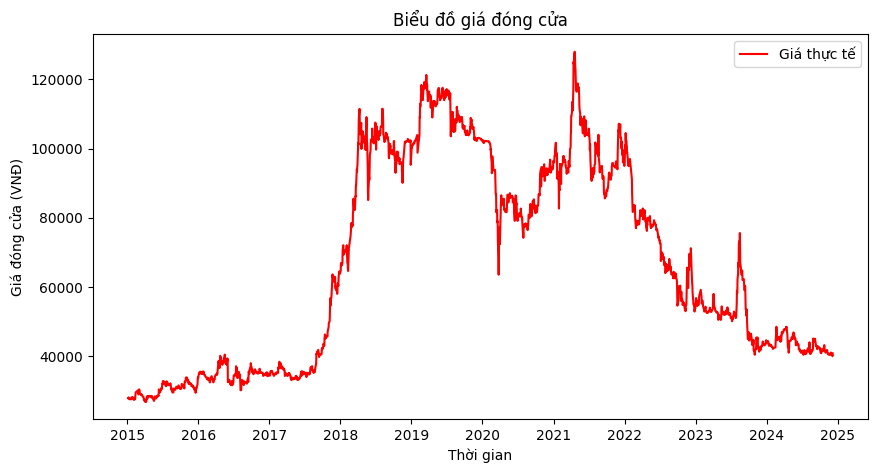

In [ ]:
#Biểu đồ giá đóng cửa
plt.figure(figsize=(10,5))
plt.plot(df1['Giá đóng cửa'], label='Giá thực tế',color='red')
plt.title("Biểu đồ giá đóng cửa")
plt.xlabel('Thời gian')
plt.ylabel("Giá đóng cửa (VNĐ)")
plt.legend()#Chú thích
plt.show()

In [ ]:
# @title Task4: Chia dữ liệu và tiền xử lý
#Chia tập dữ liệu
data=df1.values
train_size = int(len(data) * 0.75)
train_data=data[:train_size] # huấn luyện
test_data=data[train_size:] #test

In [ ]:
train_data

array([[27827.],
       [27944.],
       [27886.],
       ...,
       [76600.],
       [76700.],
       [76600.]])

In [ ]:
#Chuẩn hóa dữ liệu điều chỉnh data coi giá trị nhỏ nhất = 0 lớn nhất = 1 còn lại chạy từ 0->1
sc = MinMaxScaler(feature_range=(0, 1))
sc_train = sc.fit_transform(data)

In [ ]:
#Tạo vòng lặp các giá trị
#Mô hình sẽ sử dụng giá của 50 ngày liên tục làm cơ sở dự đoán cho giá của ngày tiếp theo
x_train,y_train=[],[]
for i in range(50,len(train_data)):
    x_train.append(sc_train[i-50:i,0])#dấu chia là lọc cắt từ i-50 đến i ví dụ i=50 [0:50]
    y_train.append(sc_train[i,0]) # giá đóng cửa ngày tiếp theo


In [ ]:
x_train # list các mảng chứa 50 giá đóng cửa liên tục

[array([0.00982534, 0.01098184, 0.01040853, 0.01213835, 0.01098184,
        0.00809553, 0.00693902, 0.00693902, 0.00866883, 0.00809553,
        0.00809553, 0.00693902, 0.00693902, 0.00693902, 0.01213835,
        0.01329485, 0.01213835, 0.00982534, 0.00982534, 0.01213835,
        0.01040853, 0.00578252, 0.00578252, 0.00519932, 0.00578252,
        0.00809553, 0.00751233, 0.01502466, 0.0236935 , 0.02657981,
        0.03236233, 0.0236935 , 0.02312019, 0.02080718, 0.02312019,
        0.03524865, 0.03236233, 0.02947601, 0.02312019, 0.02196368,
        0.02196368, 0.01965068, 0.02138049, 0.02138049, 0.01906748,
        0.01965068, 0.01965068, 0.01849417, 0.01560786, 0.01386816]),
 array([0.01098184, 0.01040853, 0.01213835, 0.01098184, 0.00809553,
        0.00693902, 0.00693902, 0.00866883, 0.00809553, 0.00809553,
        0.00693902, 0.00693902, 0.00693902, 0.01213835, 0.01329485,
        0.01213835, 0.00982534, 0.00982534, 0.01213835, 0.01040853,
        0.00578252, 0.00578252, 0.00519932, 0.

In [ ]:
y_train #là giá đóng cửa dự đoán của ngày tiếp theo trong mỗi array x_train

[0.013868158589263269,
 0.013294849110876084,
 0.009252028823628244,
 0.006939021617721197,
 0.004042820287247784,
 0.006355827493154886,
 0.0005831941245663108,
 0.0023130072059070472,
 0.0011565036029535514,
 0.0,
 0.0017396977275198622,
 0.0005831941245663108,
 0.0011565036029535514,
 0.009252028823628244,
 0.01560785631678313,
 0.009825338302015485,
 0.009252028823628244,
 0.012711654986309773,
 0.016764359919736682,
 0.01560785631678313,
 0.01502466219221682,
 0.01560785631678313,
 0.016764359919736682,
 0.016764359919736682,
 0.01560785631678313,
 0.012711654986309773,
 0.016764359919736682,
 0.012711654986309773,
 0.01560785631678313,
 0.013868158589263269,
 0.012138345507922532,
 0.009252028823628244,
 0.009252028823628244,
 0.008668834699061934,
 0.006355827493154886,
 0.0023130072059070472,
 0.004042820287247784,
 0.006939021617721197,
 0.007512331096108382,
 0.01502466219221682,
 0.013294849110876084,
 0.013868158589263269,
 0.012711654986309773,
 0.01098184190496898,
 0.009

In [ ]:
#Xếp dữ liệu thành mảng để đưa vào mô hình
x_train = np.array(x_train)
y_train = np.array(y_train)
#Xếp dữ liệu thành mảng 1 chiều
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0], 1))

In [ ]:
# @title Task5: Xây dựng mô hình
#Xây dựng mô hình
#Mô hình gồm 5 lớp 1 lớp đầu vào input 2 lớp LSTM 1 lớp Dropout 1 lớp output
model = Sequential()#Tạo lớp mạng cho dữ liệu đầu vào
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))#Kết nối với đầu vào nên mô tả thông tin đầu vào = input shape
model.add(LSTM(units=64))
model.add(Dropout(0.5))# Giúp bỏ qua 1 số đơn vị trong quá trình huấn luyện 1 cách ngẫu nhiên tránh cho mô hình học tủ
model.add(Dense(1))# Lớp output Dense với đầu ra 1 chiều để dự đoán cho 1 giá trị
model.compile(loss='mean_absolute_error',optimizer='adam')# Hàm sai số loss sẽ đo sai số tuyệt đối trung bình , Trình tối ưu hóa adam giúp tối ưu hóa quá trình học

In [ ]:


# @title Task6: Huấn luyện mô hình
save_model="save_model.keras"#Mô hình sau khi huấn luyện được lưu lại dưới dạng file save_model
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')# Sử dụng hàm ModelCheckpoint để tìm ra model được huấn luyện tốt nhất thêm vào save_model
model.fit(x_train,y_train,epochs=100,batch_size=50,verbose=2,callbacks=[best_model])



Epoch 1/100

Epoch 1: loss improved from inf to 0.12462, saving model to save_model.keras
37/37 - 7s - 197ms/step - loss: 0.1246
Epoch 2/100

Epoch 2: loss improved from 0.12462 to 0.06427, saving model to save_model.keras
37/37 - 6s - 169ms/step - loss: 0.0643
Epoch 3/100

Epoch 3: loss improved from 0.06427 to 0.06172, saving model to save_model.keras
37/37 - 10s - 271ms/step - loss: 0.0617
Epoch 4/100

Epoch 4: loss improved from 0.06172 to 0.05787, saving model to save_model.keras
37/37 - 5s - 139ms/step - loss: 0.0579
Epoch 5/100

Epoch 5: loss improved from 0.05787 to 0.05544, saving model to save_model.keras
37/37 - 4s - 104ms/step - loss: 0.0554
Epoch 6/100

Epoch 6: loss improved from 0.05544 to 0.05482, saving model to save_model.keras
37/37 - 6s - 167ms/step - loss: 0.0548
Epoch 7/100

Epoch 7: loss improved from 0.05482 to 0.05077, saving model to save_model.keras
37/37 - 5s - 141ms/step - loss: 0.0508
Epoch 8/100

Epoch 8: loss improved from 0.05077 to 0.05065, saving mode

In [ ]:
#Dữ liệu train
#y_train= Giá thực
#y_train_predict= Giá dự đoán
y_train=sc.inverse_transform(y_train)# Giá thực
final_model=load_model('save_model.keras')
y_train_predict=final_model.predict(x_train)
y_train_predict=sc.inverse_transform(y_train_predict)#Giá dự đoán

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


In [ ]:
 # @title Task7: Sử dụng mô hình

#Xử lý dữ liệu trong tập test
test=df1[len(train_data)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)
x_test=[]
for i in range(50, test.shape[0]):
    x_test.append(sc_test[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#Dữ liệu test
y_test=data[train_size:]# Giá thực
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict) #Giá dự đoán

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


<ipython-input-111-cc509a9bc27f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_1['Dự đoán']=y_train_predict #Thêm dữ liệu
<ipython-input-111-cc509a9bc27f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_1['Dự đoán']=y_test_predict # Thêm dữ liệu


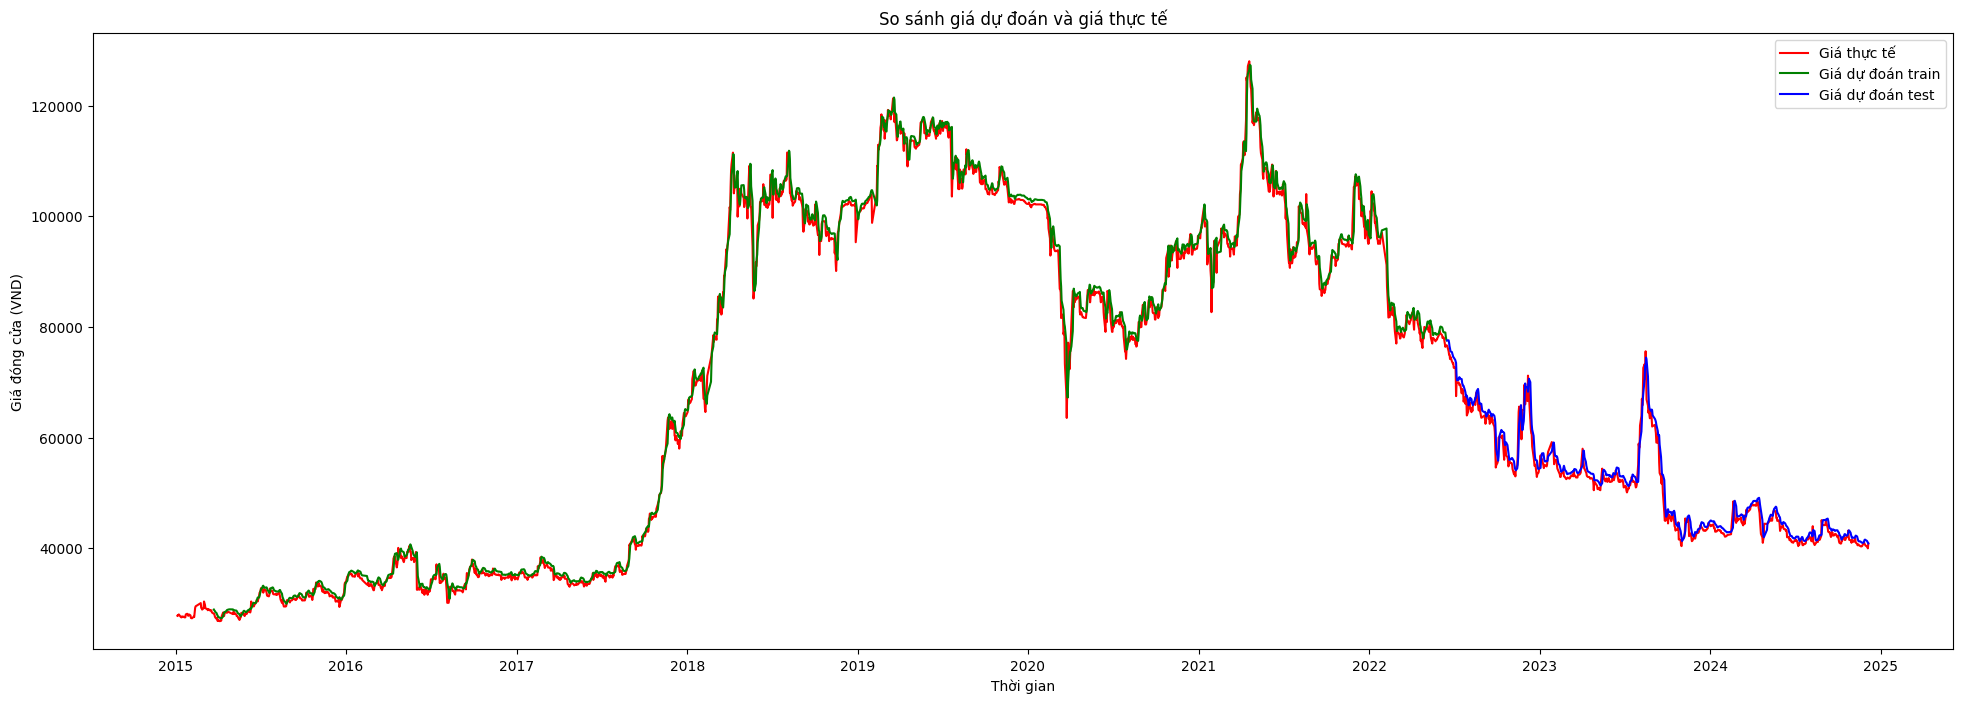

In [ ]:
# @title Task8: Kiểm tra tính chính xác của mô hình

train_data_1=df1[50:train_size]
test_data_1=df1[train_size:]
plt.figure(figsize=(24,8))
plt.plot(df1,label="Giá thực tế",color='red')# Đường giá thực tế
train_data_1['Dự đoán']=y_train_predict #Thêm dữ liệu
plt.plot(train_data_1['Dự đoán'],label='Giá dự đoán train',color='green')# Đường giá dự báo trên tập train
test_data_1['Dự đoán']=y_test_predict # Thêm dữ liệu
plt.plot(test_data_1['Dự đoán'],label='Giá dự đoán test', color='blue')# Đường giá dự báo trên tập test
plt.title("So sánh giá dự đoán và giá thực tế") #Tên biểu đồ
plt.xlabel('Thời gian')# Đặt tên hàm x trục hoành
plt.ylabel('Giá đóng cửa (VND)')
plt.legend()# Chú giải biểu đồ
plt.show()

In [ ]:
# Phù hợp train
print("Độ phù hợp tập train: ",r2_score(y_train,y_train_predict))
print("Sai số tuyệt đối trung bình tập train: ", mean_absolute_error(y_train,y_train_predict))
print("Phần trăm sai số tuyệt đối trung bình tập train: ", mean_absolute_percentage_error(y_train,y_train_predict))

Độ phù hợp tập train:  0.996779469388641
Sai số tuyệt đối trung bình tập train:  1232.8530535257755
Phần trăm sai số tuyệt đối trung bình tập train:  0.017978779762969164


In [ ]:
train_data_1

,Giá đóng cửa,Dự đoán
Ngày,,
2015-03-24,28236.0,28943.689453
2015-03-25,28178.0,28801.552734
2015-03-26,27769.0,28707.917969
2015-03-27,27535.0,28525.742188
2015-03-30,27242.0,28288.001953
...,...,...
2022-06-10,78000.0,79016.429688
2022-06-13,76400.0,78992.242188
2022-06-14,76600.0,78239.804688


In [ ]:
# Phù hợp test
print("Độ phù hợp tập test: ", r2_score(y_test, y_test_predict))
print("Sai số tuyệt đối trung bình tập test: ", mean_absolute_error(y_test, y_test_predict))
print("Phần trăm sai số tuyệt đối trung bình tập test: ", mean_absolute_percentage_error(y_test, y_test_predict))


Độ phù hợp tập test:  0.9672950193067615
Sai số tuyệt đối trung bình tập test:  1248.9187121975806
Phần trăm sai số tuyệt đối trung bình tập test:  0.0240049552756318


In [ ]:
test_data_1

,Giá đóng cửa,Dự đoán
Ngày,,
2022-06-17,76600.0,77558.351562
2022-06-20,75600.0,77584.070312
2022-06-21,75000.0,77145.140625
2022-06-22,75000.0,76501.046875
2022-06-23,74200.0,76098.351562
...,...,...
2024-11-29,40500.0,41507.523438
2024-12-02,40350.0,41355.597656
2024-12-03,40400.0,41175.882812


In [ ]:
# @title Thử dự đoán

next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)
next_date = pd.to_datetime(next_date)
next_closing_price = np.array([df['Giá đóng cửa'].iloc[-1]])
x_next = np.array([sc_train[-50:, 0]])
x_next = np.reshape(x_next, (x_next.shape[0],x_next.shape[1], 1))
y_next_predict = final_model.predict(x_next)
y_next_predict = sc.inverse_transform(y_next_predict)
df_next = pd.DataFrame({'Ngày' : [next_date], 'Giá đóng cửa' : [y_next_predict[0][0]]})
df1 = pd.concat([df1, df_next])

actual_closing_price = df['Giá đóng cửa'].iloc[-1]

comparison_df = pd.DataFrame({'Ngày' : [next_date], 'Giá dự đoán' : [y_next_predict[0][0]], 'Giá ngày trước' : actual_closing_price})

print(comparison_df)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
        Ngày   Giá dự đoán  Giá ngày trước
0 2024-12-06  41051.800781         40850.0
